In [1]:
import os

%load_ext autoreload
%autoreload 2

""""
Devo code for moment by moment decoding --> i.e., for each time bin, find strength of representation of
each class of a variable (e.g., shape), as opposed to decoding average accuracy across trials.

Here collecting methods and quick analyses
"""

'"\nDevo code for moment by moment decoding --> i.e., for each time bin, find strength of representation of\neach class of a variable (e.g., shape), as opposed to decoding average accuracy across trials.\n\nHere collecting methods and quick analyses\n'

### A note on how shapes are represented in chars

In [2]:
# SUMMARY:
# seqc_{i}_shapesem and seqc_{i}_shapesemgrp are same between char and SP/PIG.
# seqc_{i}_shape is NOT the same between SP/PIG (it uses ground-truth shape labels) and char (it uses charclust labels).

# SP/PIG (it uses ground-truth shape labels) and char (it uses charclust labels), therefore matches on semantic

# EXAMPLES:
# (1) PIG/SP tasks during char day
# ---> 

# A SP trial where the charclust label (top) differs from the ground-truth label (bottom)
# ============== beh_using_beh_data
# shape  --  ['Lcentered-4-1-0']
# shape_semantic  --  ['Lcentered-UL-UL']
# gridloc  --  [(1, 1)]
# seqc_{i}_shape: ['zigzagSq-92-3.5-0.5']
# seqc_{i}_shapesem: ['zigzagSq-UU-0.0']
# seqc_{i}_shapesemgrp: ['ZZ-UU-0.0']
# ============== beh_using_task_data
# shape  --  ['zigzagSq-92-3.5-0.5']
# shape_semantic  --  ['zigzagSq-UU-0.0']
# gridloc  --  [(1, 1)]
# seqc_{i}_shape: ['zigzagSq-92-3.5-0.5']
# seqc_{i}_shapesem: ['zigzagSq-UU-0.0']
# seqc_{i}_shapesemgrp: ['ZZ-UU-0.0']

# A CHAR trial
# ============== beh_using_beh_data
# shape  --  ['line-8-2-0', 'squiggle3-3-1-1', 'arcdeep-4-3-0', 'line-8-1-0']
# shape_semantic  --  ['line-UU-UU', 'squiggle3-UU-0.0', 'arcdeep-RR-RR', 'line-LL-LL']
# gridloc  --  [('IGN', 'IGN'), ('IGN', 'IGN'), ('IGN', 'IGN'), ('IGN', 'IGN')]
# seqc_{i}_shape: ['line-8-2-0', 'squiggle3-3-1-1', 'arcdeep-4-3-0', 'line-8-1-0']
# seqc_{i}_shapesem: ['line-UU-UU', 'squiggle3-UU-0.0', 'arcdeep-RR-RR', 'line-LL-LL']
# seqc_{i}_shapesemgrp: ['line-UU-UU', 'ZZ-UU-0.0', 'ARC-RR', 'line-LL-LL']
# ============== beh_using_task_data
# shape  --  ['line-8-2-0', 'squiggle3-3-1-1', 'arcdeep-4-3-0', 'line-8-1-0']
# shape_semantic  --  ['line-UU-UU', 'squiggle3-UU-0.0', 'arcdeep-RR-RR', 'line-LL-LL']
# gridloc  --  [('IGN', 'IGN'), ('IGN', 'IGN'), ('IGN', 'IGN'), ('IGN', 'IGN')]
# seqc_{i}_shape: ['line-8-2-0', 'squiggle3-3-1-1', 'arcdeep-4-3-0', 'line-8-1-0']
# seqc_{i}_shapesem: ['line-UU-UU', 'squiggle3-UU-0.0', 'arcdeep-RR-RR', 'line-LL-LL']
# seqc_{i}_shapesemgrp: ['line-UU-UU', 'ZZ-UU-0.0', 'ARC-RR', 'line-LL-LL']


# Load a dataset

To load and plot a dataset of neural activity across population, in a PopAnal class object.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# (1) Load the dataset Diego 230630

In [5]:
from neuralmonkey.classes.population_mult import load_handsaved_wrapper

DFallpa = load_handsaved_wrapper()


In [6]:
DFallpa

,which_level,event,bregion,twind,pa,pa_x_shape
0,trial,03_samp,M1,"(-1.0, 1.0)",<neuralmonkey.classes.population.PopAnal objec...,"(38, 758, 200)"
1,trial,03_samp,PMv,"(-1.0, 1.0)",<neuralmonkey.classes.population.PopAnal objec...,"(55, 758, 200)"
2,trial,03_samp,PMd,"(-1.0, 1.0)",<neuralmonkey.classes.population.PopAnal objec...,"(53, 758, 200)"
3,trial,03_samp,dlPFC,"(-1.0, 1.0)",<neuralmonkey.classes.population.PopAnal objec...,"(20, 758, 200)"
4,trial,03_samp,vlPFC,"(-1.0, 1.0)",<neuralmonkey.classes.population.PopAnal objec...,"(25, 758, 200)"
5,trial,03_samp,FP,"(-1.0, 1.0)",<neuralmonkey.classes.population.PopAnal objec...,"(32, 758, 200)"
6,trial,03_samp,SMA,"(-1.0, 1.0)",<neuralmonkey.classes.population.PopAnal objec...,"(52, 758, 200)"
7,trial,03_samp,preSMA,"(-1.0, 1.0)",<neuralmonkey.classes.population.PopAnal objec...,"(39, 758, 200)"
8,trial,05_first_raise,M1,"(-1.0, 1.0)",<neuralmonkey.classes.population.PopAnal objec...,"(38, 758, 200)"
9,trial,05_first_raise,PMv,"(-1.0, 1.0)",<neuralmonkey.classes.population.PopAnal objec...,"(55, 758, 200)"


In [ ]:
pa = DFallpa["pa"].values[0]
dflab = pa.Xlabels["trials"]
dflab["seqc_0_shapesemgrp"].value_counts()

# Preprocessing

### FR Normalization

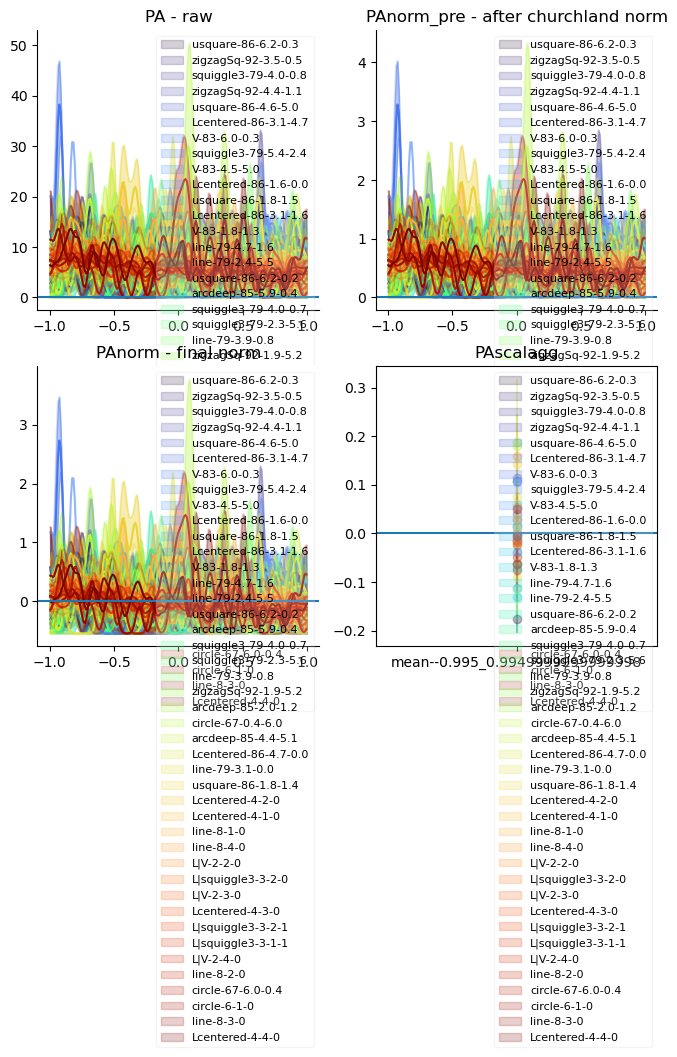

In [7]:
from neuralmonkey.classes.population_mult import dfallpa_preprocess_fr_normalization
# fr_normalization_method = "each_time_bin"
fr_normalization_method = "across_time_bins"
plot_savedir = "/tmp"
dfallpa_preprocess_fr_normalization(DFallpa, fr_normalization_method, plot_savedir)

### Factorize all relevant labels FIRST here.


In [8]:
if False: # Ingore this for now
    from neuralmonkey.analyses.decode_good import preprocess_factorize_class_labels_ints
    MAP_LABELS_TO_INT = preprocess_factorize_class_labels_ints(DFallpa)

### Pull out PMv data for now

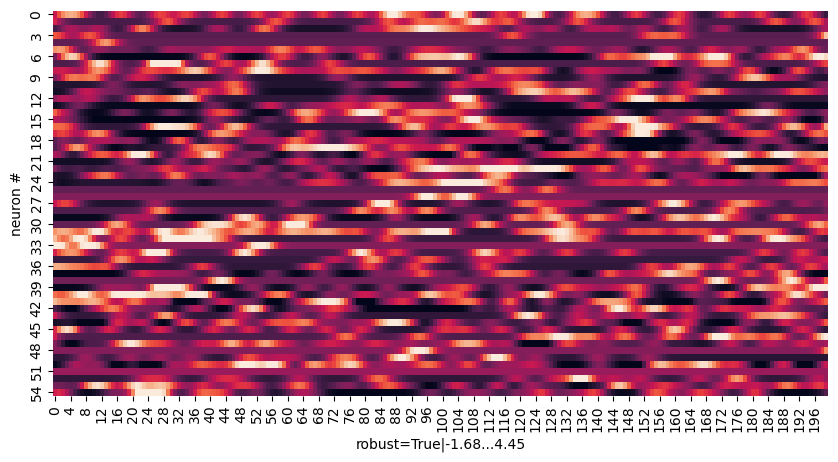

In [9]:
bregions = ["PMv"]
# bregions = ["vlPFC"]
events = ["03_samp"]

DFallpa = DFallpa[(DFallpa["bregion"].isin(bregions)) & (DFallpa["event"].isin(events))].reset_index(drop=True)
PA =DFallpa["pa"].values[0]
PA.plotNeurHeat(trial=100)



### Extract relevant variables

In [10]:
dflab = PA.Xlabels["trials"]

# (1) shapes drawn (tuple of shapes)
list_shapes_drawn = []
for ind in range(len(dflab)):
    shapes_drawn = tuple([dflab.iloc[ind][f"seqc_{i}_shapesemgrp"] for i in range(6) if dflab.iloc[ind][f"seqc_{i}_shapesemgrp"] != "IGN"])
    list_shapes_drawn.append(shapes_drawn)
dflab["shapes_drawn"] = list_shapes_drawn    

##### Train decoder (fiurst Extract data for pre-samp and post-samp)

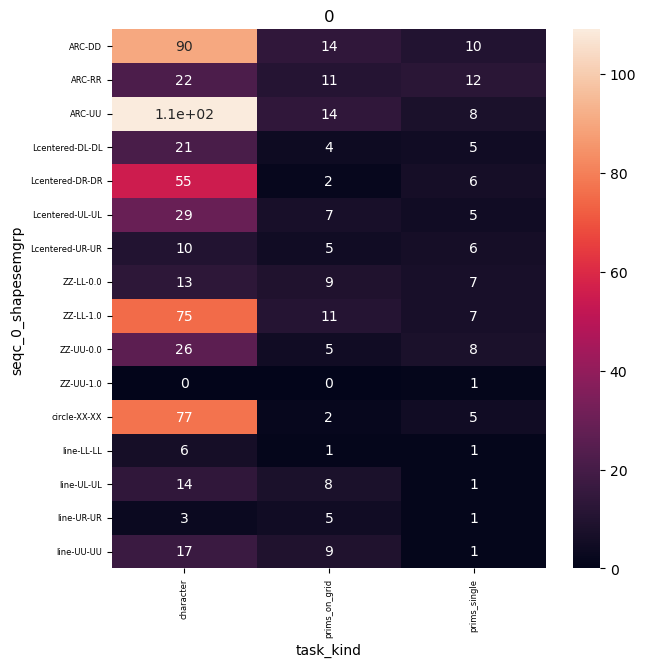

In [11]:
dflab["FEAT_num_strokes_task"]
from pythonlib.tools.pandastools import grouping_plot_n_samples_conjunction_heatmap
grouping_plot_n_samples_conjunction_heatmap(dflab, "seqc_0_shapesemgrp", "task_kind");

In [12]:
from neuralmonkey.analyses.decode_moment import Decoder
var = "seqc_0_shapesemgrp" # Decoded variable


In [13]:
# Train decoder on trials that only have one stroke..

inds = dflab[dflab["FEAT_num_strokes_task"]==1].index.tolist()
PAtrain = PA.slice_by_dim_indices_wrapper("trials", inds)

# Prune to keep only cases with at least n trials per label
from pythonlib.tools.pandastools import extract_with_levels_of_var_good
_, inds_keep = extract_with_levels_of_var_good(PAtrain.Xlabels["trials"], [var], n_min_per_var=5)

print("Keeping n trials / total: ", len(inds_keep), "/", len(PAtrain.Trials))

PAtrain = PAtrain.slice_by_dim_indices_wrapper("trials", inds_keep)

Keeping n trials / total:  79 / 84


(158, 55)
158
ARC-RR [0 1 0 0 0 0 0 0 0 0 0 0]
ZZ-UU-0.0 [0 0 0 0 0 0 0 0 0 1 0 0]
ZZ-UU-0.0 [0 0 0 0 0 0 0 0 0 1 0 0]
ZZ-LL-1.0 [0 0 0 0 0 0 0 0 1 0 0 0]
ZZ-LL-1.0 [0 0 0 0 0 0 0 0 1 0 0 0]
ARC-DD [1 0 0 0 0 0 0 0 0 0 0 0]
ZZ-UU-0.0 [0 0 0 0 0 0 0 0 0 1 0 0]
Lcentered-DL-DL [0 0 0 1 0 0 0 0 0 0 0 0]
ARC-RR [0 1 0 0 0 0 0 0 0 0 0 0]
ARC-DD [1 0 0 0 0 0 0 0 0 0 0 0]
Lcentered-UR-UR [0 0 0 0 0 0 1 0 0 0 0 0]
Lcentered-UL-UL [0 0 0 0 0 1 0 0 0 0 0 0]
ARC-RR [0 1 0 0 0 0 0 0 0 0 0 0]
ZZ-LL-0.0 [0 0 0 0 0 0 0 1 0 0 0 0]
Lcentered-DR-DR [0 0 0 0 1 0 0 0 0 0 0 0]
ZZ-LL-1.0 [0 0 0 0 0 0 0 0 1 0 0 0]
ARC-UU [0 0 1 0 0 0 0 0 0 0 0 0]
Lcentered-DR-DR [0 0 0 0 1 0 0 0 0 0 0 0]
ZZ-UU-0.0 [0 0 0 0 0 0 0 0 0 1 0 0]
ARC-UU [0 0 1 0 0 0 0 0 0 0 0 0]
ARC-RR [0 1 0 0 0 0 0 0 0 0 0 0]
Lcentered-UL-UL [0 0 0 0 0 1 0 0 0 0 0 0]
Lcentered-UR-UR [0 0 0 0 0 0 1 0 0 0 0 0]
ARC-RR [0 1 0 0 0 0 0 0 0 0 0 0]
ARC-DD [1 0 0 0 0 0 0 0 0 0 0 0]
ARC-DD [1 0 0 0 0 0 0 0 0 0 0 0]
circle-XX-XX [0 0 0 0 0 0 0 0 0 0 1 0]
ZZ

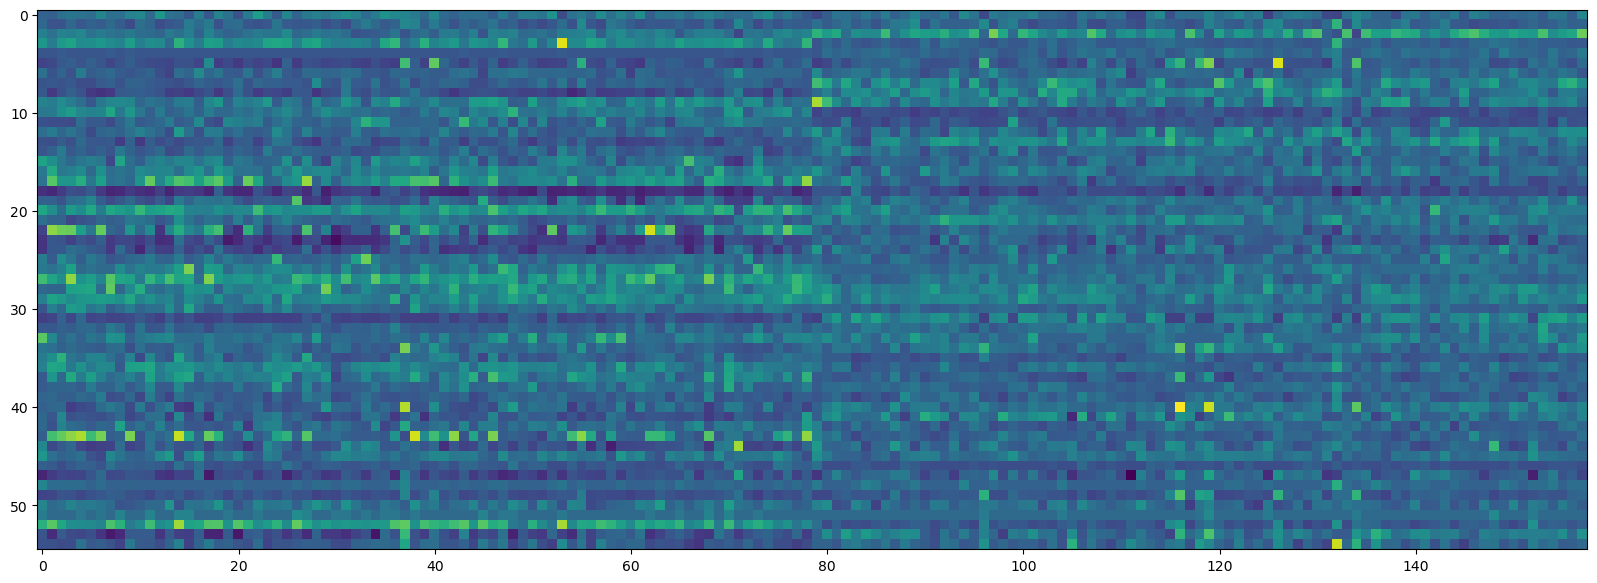

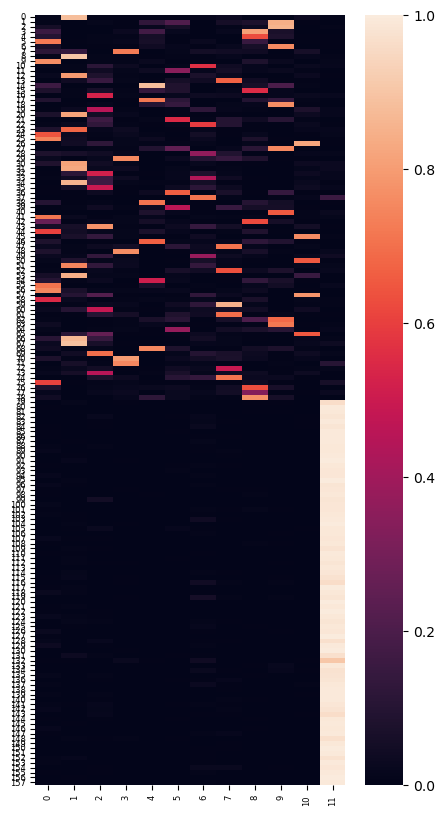

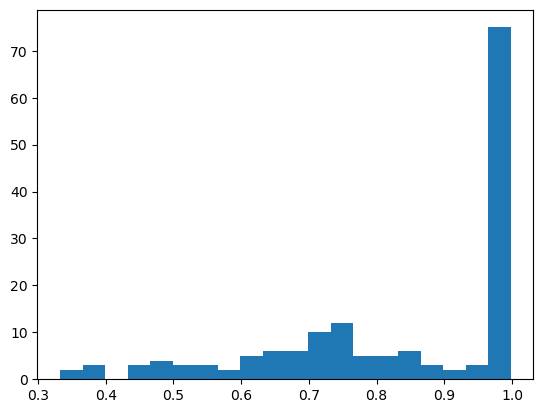

In [14]:
##### Method 1 -- use entire window (time mean)

# post-samp
twind = [0.1, 0.95]
pa_train_postsamp = PAtrain.slice_by_dim_values_wrapper("times", twind) 
pa_train_postsamp = pa_train_postsamp.agg_wrapper("times")

# pre-samp
twind = [-0.8, -0.1]
pa_train_presamp = PAtrain.slice_by_dim_values_wrapper("times", twind) 
pa_train_presamp = pa_train_presamp.agg_wrapper("times")
# relabel all as presamp
pa_train_presamp.Xlabels["trials"][var] = "presamp"

# Concatenate pre and post samp
from neuralmonkey.classes.population import concatenate_popanals_flexible
pa_train_all, _= concatenate_popanals_flexible([pa_train_postsamp, pa_train_presamp])

# Update the params
pa_train_all.Times = [0]
twind_train = [-1, 1]


Dc1 = Decoder(pa_train_all, var, twind_train)
Dc1.train_decoder(PLOT=True)


(553, 55)
553
presamp [0 0 0 0 0 0 0 0 0 0 0 1]
presamp [0 0 0 0 0 0 0 0 0 0 0 1]
presamp [0 0 0 0 0 0 0 0 0 0 0 1]
presamp [0 0 0 0 0 0 0 0 0 0 0 1]
presamp [0 0 0 0 0 0 0 0 0 0 0 1]
presamp [0 0 0 0 0 0 0 0 0 0 0 1]
presamp [0 0 0 0 0 0 0 0 0 0 0 1]
presamp [0 0 0 0 0 0 0 0 0 0 0 1]
presamp [0 0 0 0 0 0 0 0 0 0 0 1]
presamp [0 0 0 0 0 0 0 0 0 0 0 1]
presamp [0 0 0 0 0 0 0 0 0 0 0 1]
presamp [0 0 0 0 0 0 0 0 0 0 0 1]
presamp [0 0 0 0 0 0 0 0 0 0 0 1]
presamp [0 0 0 0 0 0 0 0 0 0 0 1]
presamp [0 0 0 0 0 0 0 0 0 0 0 1]
presamp [0 0 0 0 0 0 0 0 0 0 0 1]
presamp [0 0 0 0 0 0 0 0 0 0 0 1]
presamp [0 0 0 0 0 0 0 0 0 0 0 1]
presamp [0 0 0 0 0 0 0 0 0 0 0 1]
presamp [0 0 0 0 0 0 0 0 0 0 0 1]
presamp [0 0 0 0 0 0 0 0 0 0 0 1]
presamp [0 0 0 0 0 0 0 0 0 0 0 1]
presamp [0 0 0 0 0 0 0 0 0 0 0 1]
presamp [0 0 0 0 0 0 0 0 0 0 0 1]
presamp [0 0 0 0 0 0 0 0 0 0 0 1]
presamp [0 0 0 0 0 0 0 0 0 0 0 1]
presamp [0 0 0 0 0 0 0 0 0 0 0 1]
presamp [0 0 0 0 0 0 0 0 0 0 0 1]
presamp [0 0 0 0 0 0 0 0 0 0 0 1]


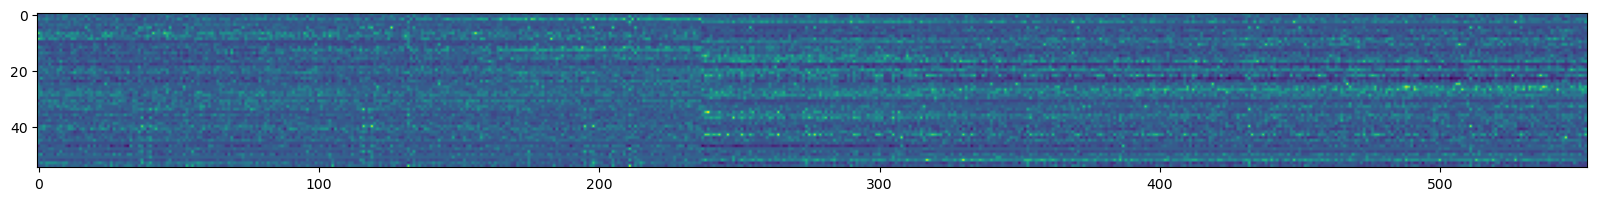

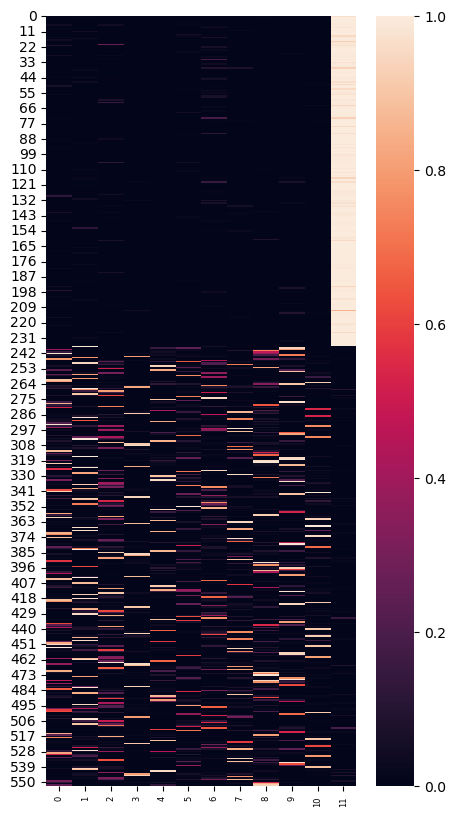

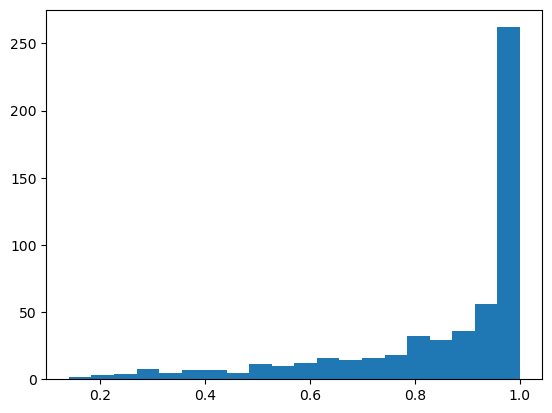

In [18]:
##### Method 2 -- use each time bin
# PAtrain = PAtrain.slice_by_dim_values_wrapper("times", twind)
# PAtrain = PAtrain.agg_by_time_windows_binned(dur, slide)
# reshape PA to 

dur = 0.250
slide = 0.2

# Get post-samp time bins
twind = [0.1, 1.0]
reshape_method = "chans_x_trialstimes"
X, PAfinal, PAslice, pca, X_before_dimred = PAtrain.dataextract_state_space_decode_flex(twind_overall=twind, tbin_dur=dur, tbin_slide=slide,
                                            reshape_method=reshape_method,
                                            norm_subtract_single_mean_each_chan=False)
pa_train_postsamp = PAfinal

# Get pre-samp time bins
twind = [-0.8, -0.1]
reshape_method = "chans_x_trialstimes"
X, PAfinal, PAslice, pca, X_before_dimred = PAtrain.dataextract_state_space_decode_flex(twind_overall=twind, tbin_dur=dur, tbin_slide=slide,
                                            reshape_method=reshape_method,
                                            norm_subtract_single_mean_each_chan=False)
pa_train_presamp = PAfinal
# relabel all as presamp
pa_train_presamp.Xlabels["trials"][var] = "presamp"

# Concatenate pre and post samp
from neuralmonkey.classes.population import concatenate_popanals_flexible
pa_train_all, _= concatenate_popanals_flexible([pa_train_presamp, pa_train_postsamp])

# Update the params
twind_train = [-1, 1]

Dc2 = Decoder(pa_train_all, var, twind_train)
Dc2.train_decoder(PLOT=True)


In [19]:
##### Plot (training) trials

{'ARC-DD': array([0.18995, 0.07176, 0.23217, 1.     ]),
 'ARC-RR': array([0.26652, 0.32768, 0.76412, 1.     ]),
 'ARC-UU': array([0.26592, 0.55979, 0.99583, 1.     ]),
 'Lcentered-DL-DL': array([0.12698, 0.78037, 0.8759 , 1.     ]),
 'Lcentered-DR-DR': array([0.16319, 0.93609, 0.63137, 1.     ]),
 'Lcentered-UL-UL': array([0.48879, 0.99828, 0.33816, 1.     ]),
 'Lcentered-UR-UR': array([0.75617, 0.95121, 0.20343, 1.     ]),
 'ZZ-LL-0.0': array([0.94489, 0.79634, 0.228  , 1.     ]),
 'ZZ-LL-1.0': array([0.99419, 0.56386, 0.15918, 1.     ]),
 'ZZ-UU-0.0': array([0.91572, 0.3053 , 0.05134, 1.     ]),
 'circle-XX-XX': array([0.74617, 0.13098, 0.00851, 1.     ]),
 'presamp': array([0.4796 , 0.01583, 0.01055, 1.     ])}

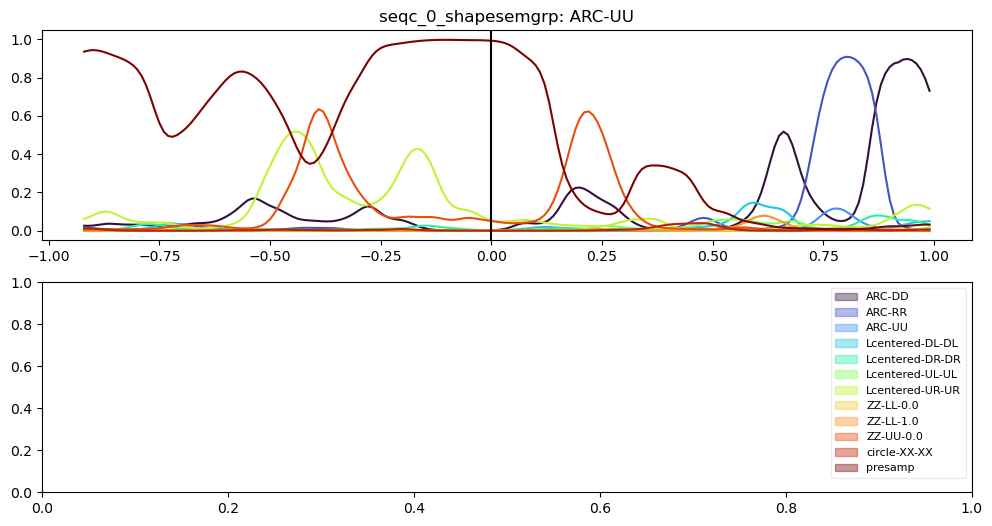

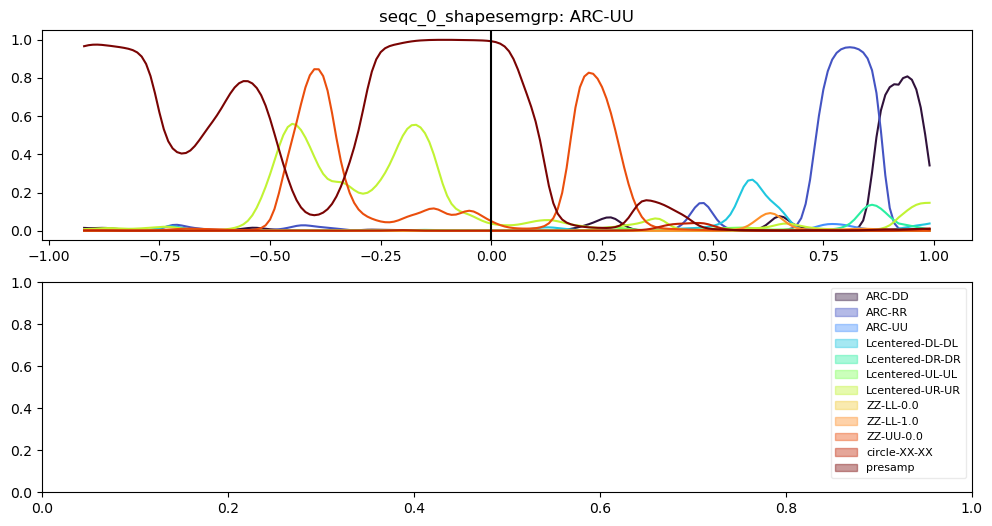

In [23]:
trial = 20
Dc1.plot_single_trial(trial, PA=PA, shape_var="seqc_0_shapesemgrp")
Dc2.plot_single_trial(trial, PA=PA, shape_var="seqc_0_shapesemgrp")

##### Pick a single decoder

In [24]:
Dc = Dc2

##### Get a single scalar score (by averaging the decode across time bins)


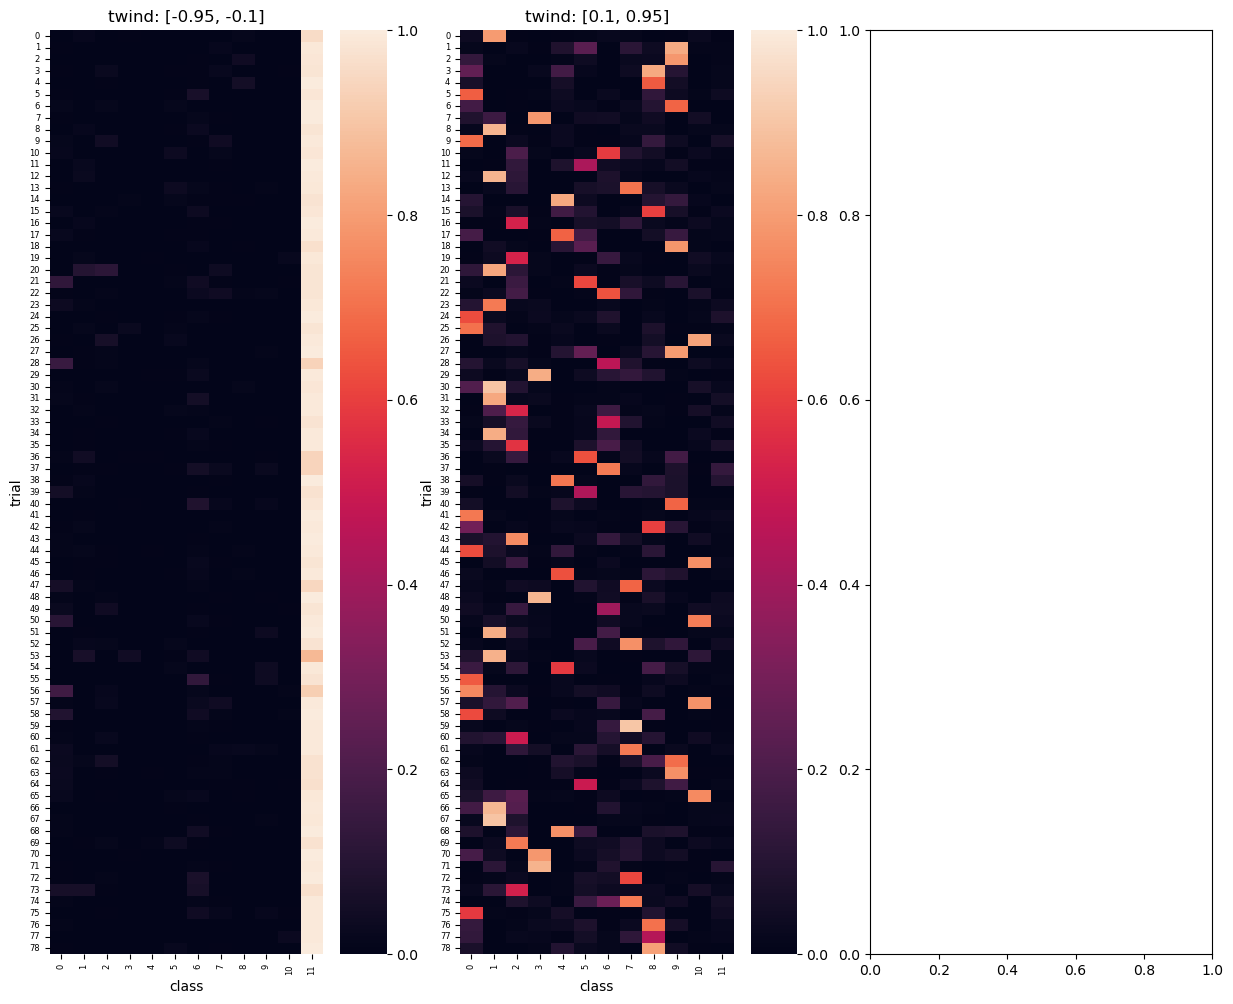

In [26]:
list_twind = [
    [-0.95, -0.1],
    [0.1, 0.95],
]

scores = Dc.scalar_score_twinds_trials(list_twind)

##### Average the decode over trials, to return a single row per trial class

In [ ]:
# Returns array: (ntrial classes, n decode clasess, ntwinds)

In [ ]:
vars_trial = [var]

Dc.scalar_score_twinds_trialgroupings(vars_trial, list_twind, PLOT=True)

0 ('ARC-DD',)
0 ('ARC-RR',)
0 ('ARC-UU',)
0 ('Lcentered-DL-DL',)
0 ('Lcentered-DR-DR',)
0 ('Lcentered-UL-UL',)
0 ('Lcentered-UR-UR',)
0 ('ZZ-LL-0.0',)
0 ('ZZ-LL-1.0',)
0 ('ZZ-UU-0.0',)
0 ('circle-XX-XX',)
1 ('ARC-DD',)
1 ('ARC-RR',)
1 ('ARC-UU',)
1 ('Lcentered-DL-DL',)
1 ('Lcentered-DR-DR',)
1 ('Lcentered-UL-UL',)
1 ('Lcentered-UR-UR',)
1 ('ZZ-LL-0.0',)
1 ('ZZ-LL-1.0',)
1 ('ZZ-UU-0.0',)
1 ('circle-XX-XX',)


array([[[2.91624049e-02, 6.64200303e-01],
        [4.00434712e-03, 3.50641258e-02],
        [8.53414193e-03, 1.13278109e-02],
        [3.27379209e-03, 9.20526299e-03],
        [1.06874059e-03, 3.80919535e-02],
        [2.40075585e-03, 1.23642602e-02],
        [3.22117077e-02, 2.24669420e-02],
        [8.96132712e-03, 4.95637808e-03],
        [1.80252940e-03, 8.11273500e-02],
        [5.70880847e-03, 1.17986013e-02],
        [3.41335860e-03, 7.46192796e-03],
        [9.84509359e-01, 2.86772508e-02]],

       [[6.20024629e-03, 6.56839457e-02],
        [2.08434410e-02, 8.38731226e-01],
        [1.18860063e-02, 7.57695957e-02],
        [5.34820221e-03, 1.02683467e-02],
        [9.45316734e-04, 4.36968171e-03],
        [3.30742152e-03, 9.01068910e-03],
        [1.36012091e-02, 4.68219474e-02],
        [3.87117276e-03, 1.16808582e-02],
        [2.88047985e-03, 5.03708656e-03],
        [4.79081617e-03, 2.06699855e-03],
        [9.76349222e-04, 2.89656999e-02],
        [9.77539434e-01, 1.68993

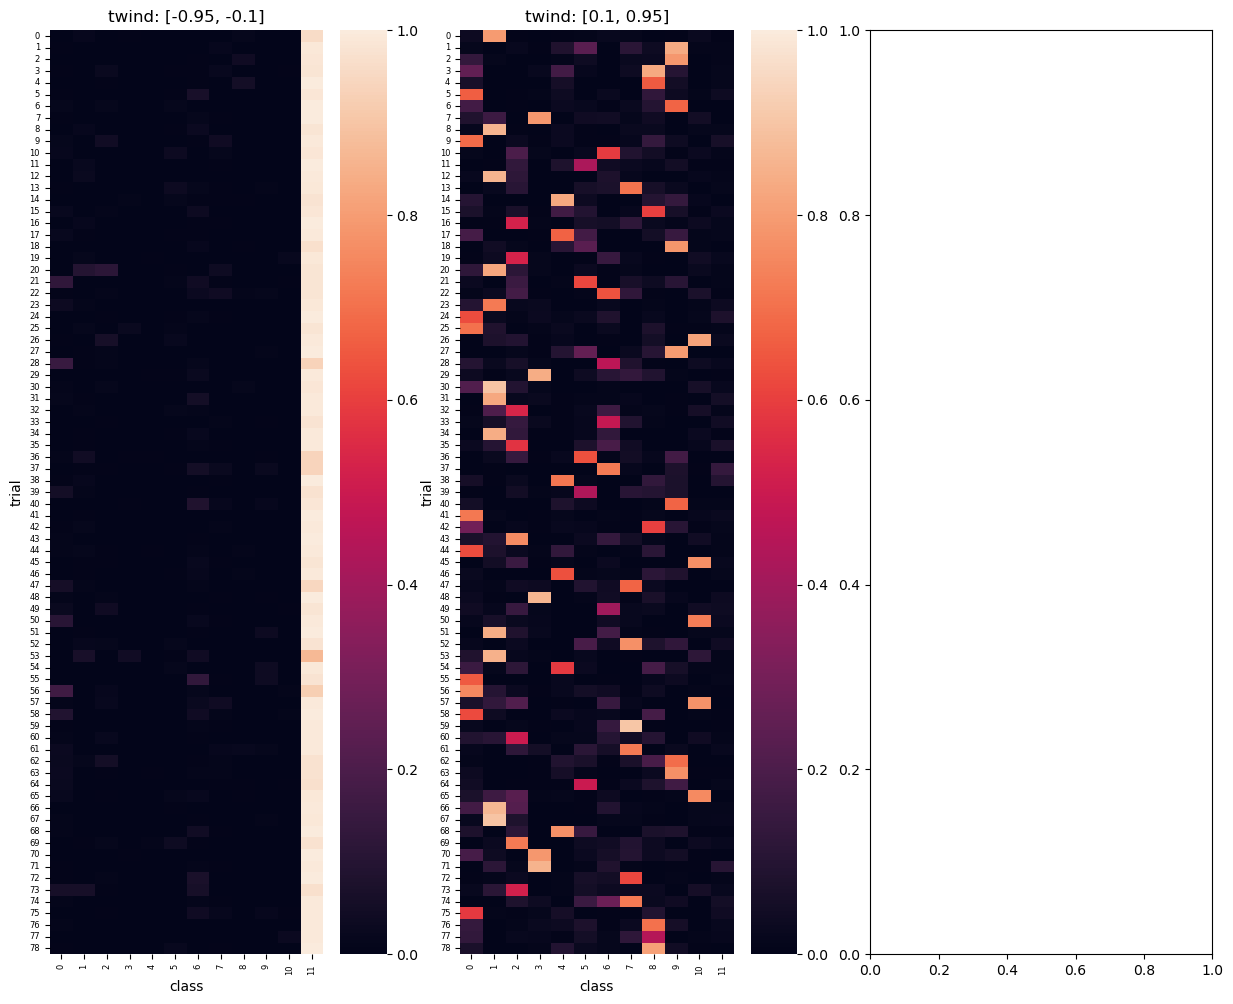

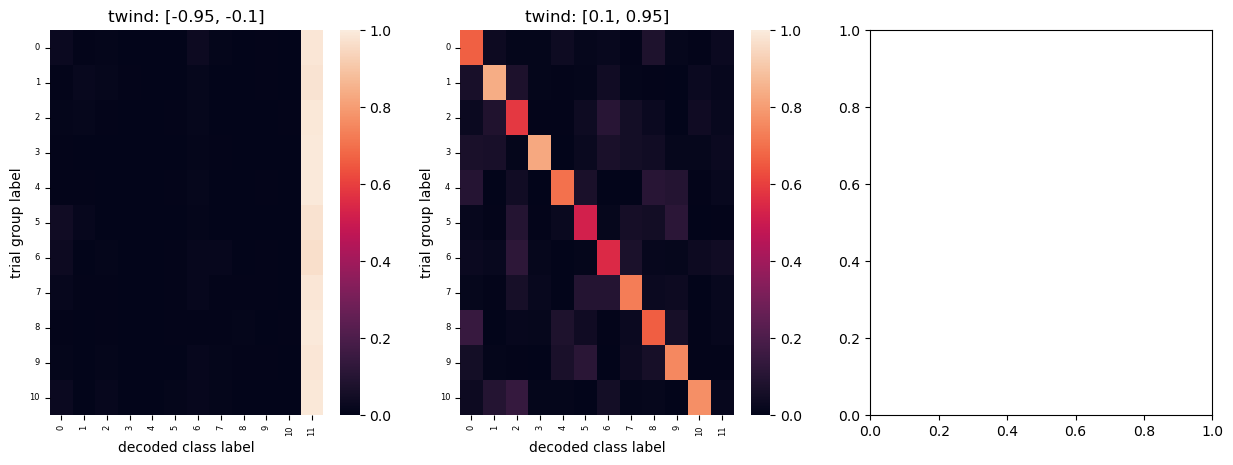

In [27]:
vars_trial = [var]

Dc.scalar_score_twinds_trialgroupings(vars_trial, list_twind, PLOT=True)

# Test on char

In [28]:
dflab["task_kind"].value_counts()

task_kind
character        567
prims_on_grid    107
prims_single      84
Name: count, dtype: int64

In [29]:
dflab = PA.Xlabels["trials"]
inds_char = dflab[dflab["task_kind"]=="character"].index.tolist()
# inds_char = dflab[dflab["task_kind"]=="prims_on_grid"].index.tolist()


In [30]:
# get only characters whos shapes are included in the shapes the decoder knows
shapes_decoder = Dc.MultiLabelBinarizer.classes_.tolist()
dflab = PA.Xlabels["trials"]

ind = 214
inds_good = []
for ind in range(len(dflab)):
    shapes_drawn = dflab.iloc[ind]["shapes_drawn"]
    if all([sh in shapes_decoder for sh in shapes_drawn]):
        inds_good.append(ind)

# Find inidices that are also char
inds_good_char = [ind for ind in inds_good if ind in inds_char]
print(inds_good_char)

[110, 118, 126, 127, 128, 135, 141, 144, 147, 148, 151, 165, 166, 167, 170, 177, 182, 185, 186, 188, 189, 201, 207, 211, 213, 219, 221, 223, 224, 225, 228, 230, 234, 237, 238, 243, 249, 250, 253, 254, 263, 266, 267, 273, 277, 282, 293, 296, 306, 307, 317, 322, 323, 324, 331, 332, 333, 339, 341, 344, 348, 351, 352, 353, 361, 363, 381, 400, 404, 406, 408, 409, 410, 413, 417, 424, 425, 426, 429, 437, 449, 451, 453, 461, 463, 472, 480, 481, 482, 483, 491, 492, 493, 494, 496, 498, 503, 513, 516, 518, 519, 523, 526, 527, 530, 531, 540, 542, 547, 548, 550, 553, 560, 566, 573, 574, 575, 579, 585, 586, 596, 597, 598, 600, 601, 609, 621, 623, 626, 635, 642, 643, 645, 647, 648, 653, 654, 656, 657, 660, 665, 668, 669, 671, 674, 677, 679, 680, 681, 682, 687, 691, 692, 695, 701, 702, 707, 709, 711, 719, 722]


In [31]:
PAchar = PA.slice_by_dim_indices_wrapper("trials", inds_good_char)

In [32]:
A = dflab["FEAT_num_strokes_beh"].tolist()
B = [len(x) for x in dflab["shapes_drawn"]]
A == B



True

Trialcode: 231211-1-348
Drawn:  ['ARC-UU', 'Lcentered-DL-DL', 'IGN', 'IGN', 'IGN']


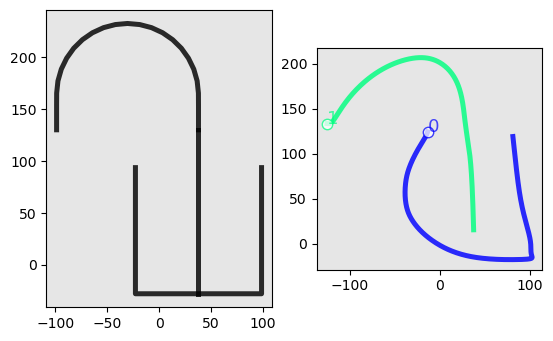

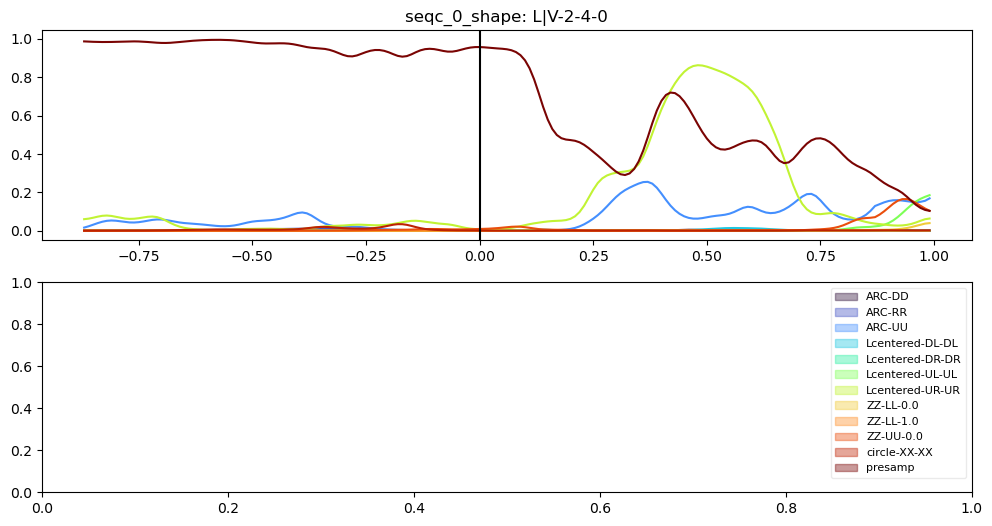

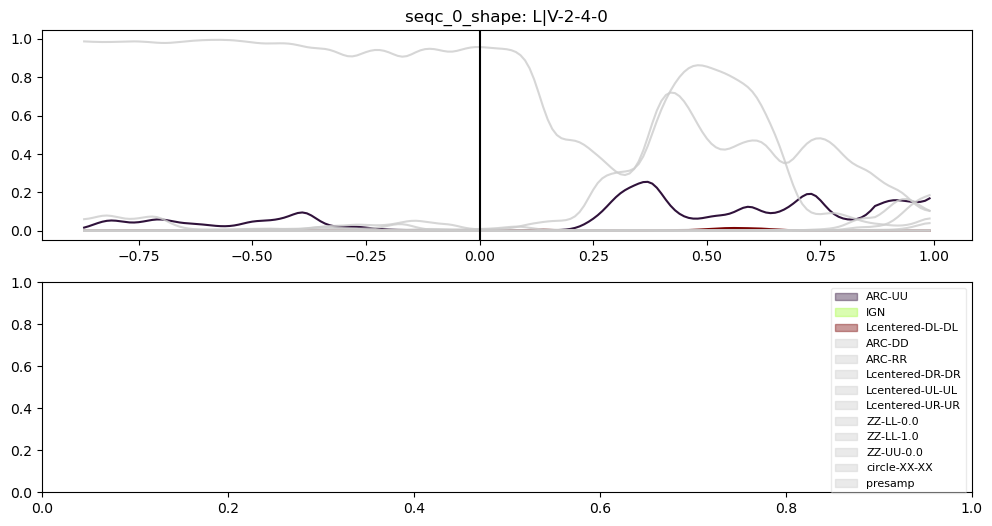

In [36]:
# Plot this trial
import matplotlib.pyplot as plt

ind = 144
tbin_dur = 0.25

strokes = [tok["Prim"].Stroke() for tok in dflab.iloc[ind]["Tktask"].Tokens]
from pythonlib.drawmodel.strokePlots import plotDatStrokesWrapper
fig, axes = plt.subplots(1,2)

ax = axes.flatten()[0]
plotDatStrokesWrapper(strokes, ax, color="k", mark_stroke_onset=False, add_stroke_number=False)

ax = axes.flatten()[1]
strokes = [tok["Prim"].Stroke() for tok in dflab.iloc[ind]["Tkbeh_stkbeh"].Tokens]
plotDatStrokesWrapper(strokes, ax,  mark_stroke_onset=True, add_stroke_number=True)

print("Trialcode:", dflab.iloc[ind]["trialcode"])

# sequence that is drawn, on this trial

print("Drawn: ", [dflab.iloc[ind][f"seqc_{i}_shapesemgrp"] for i in range(5)])

map_lab_to_col = Dc.plot_single_trial(ind, PA=PA, tbin_dur=tbin_dur)
shapes_all = Dc.MultiLabelBinarizer.classes_.tolist()
import numpy as np

# label by first second, etc
from pythonlib.tools.plottools import color_make_map_discrete_labels
labels = [dflab.iloc[ind][f"seqc_{i}_shapesemgrp"] for i in range(4)]

# append all the other shapes
_map_lev_to_color, _, _ = color_make_map_discrete_labels(labels)

for sh in shapes_all:
    if sh not in _map_lev_to_color:
        # _map_lev_to_color[sh] = np.array([1., 1., 1., 1.])
        _map_lev_to_color[sh] = np.array([0.8, 0.8, 0.8, 0.8])

map_lab_to_col = Dc.plot_single_trial(ind, PA=PA, map_lab_to_col=_map_lev_to_color, tbin_dur=tbin_dur)

0.17494091152925892
0.09001037795750508


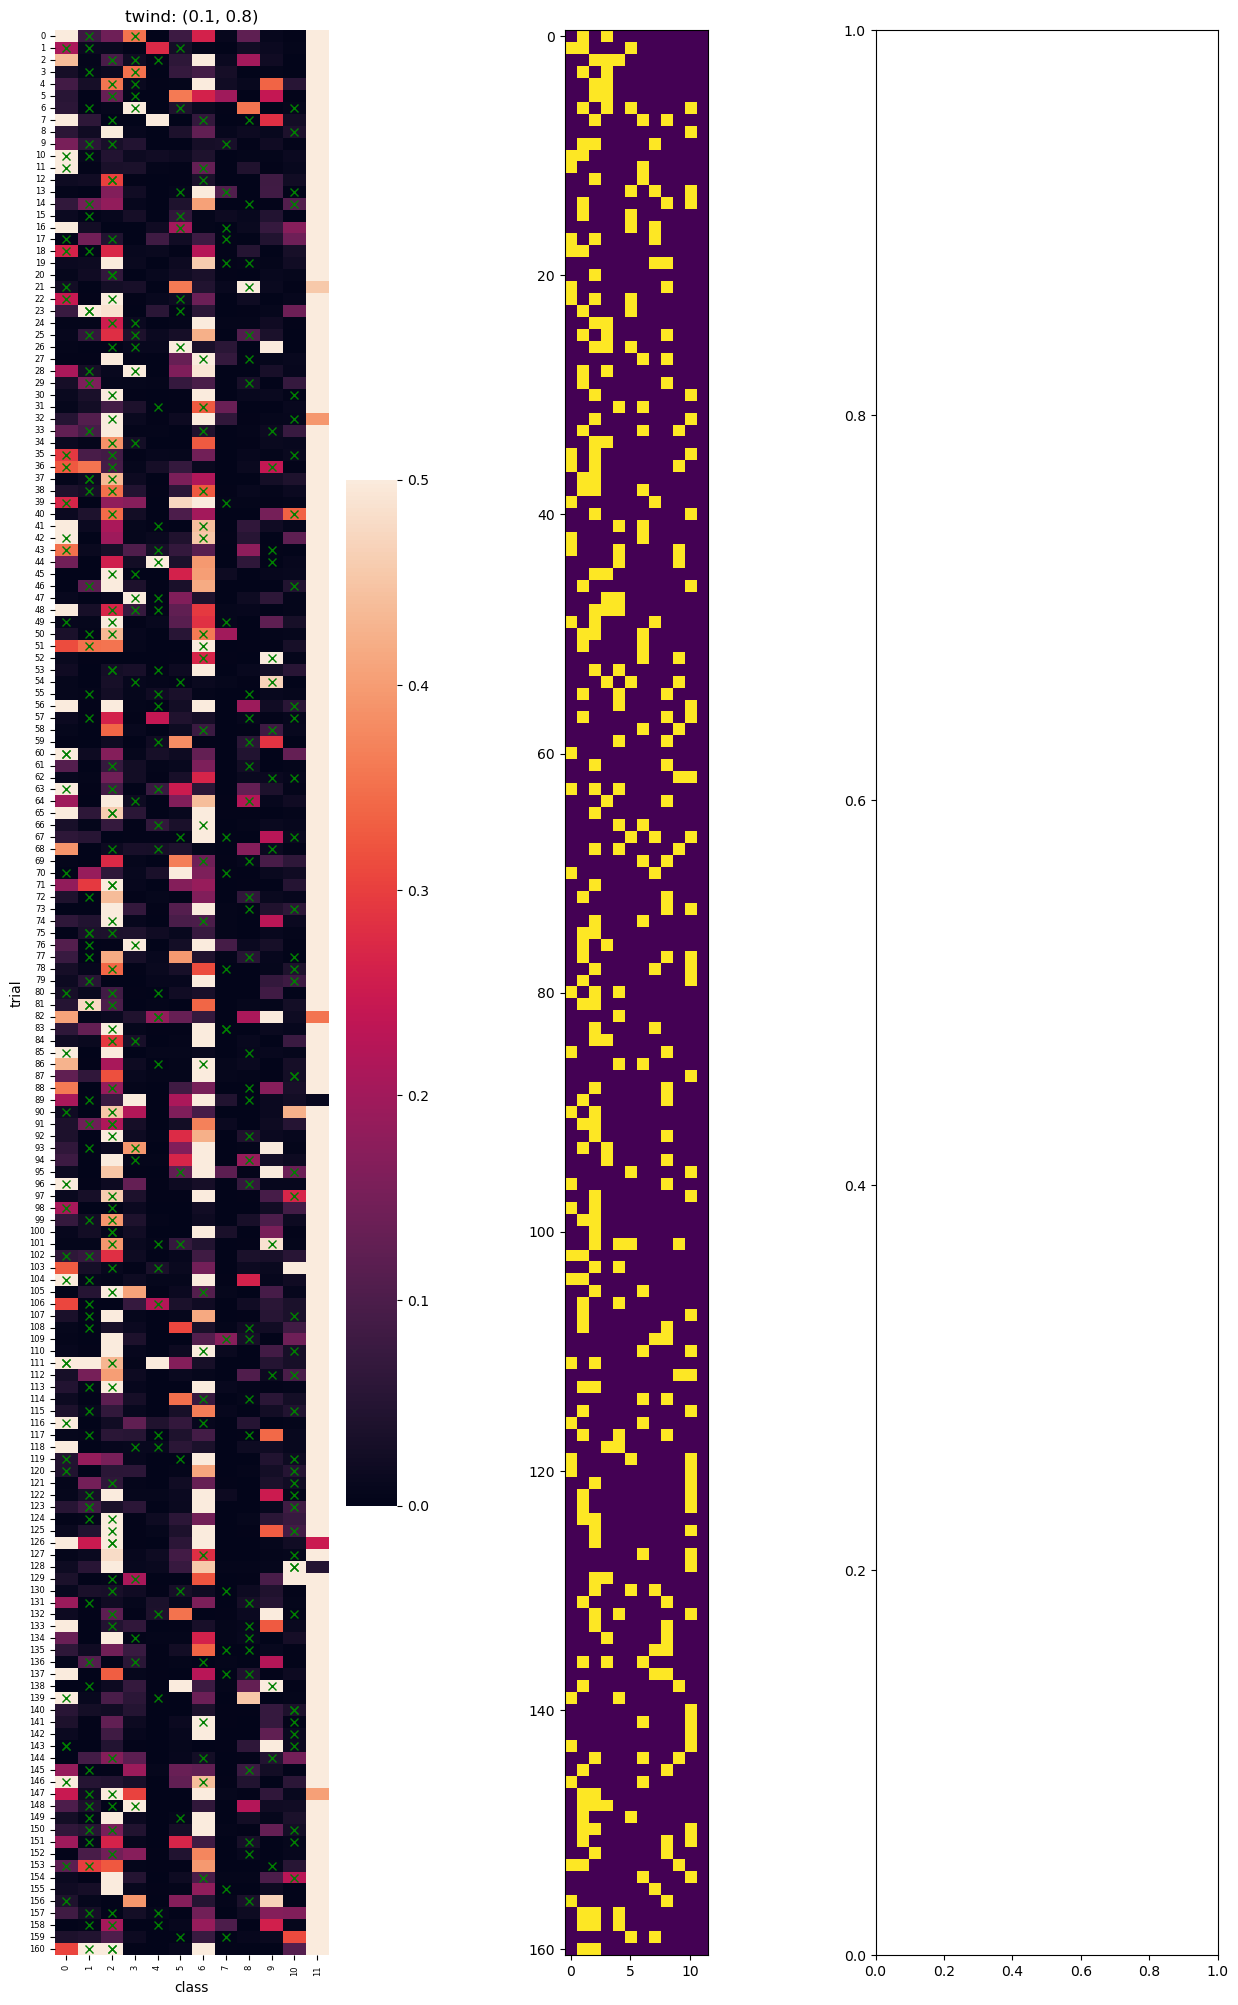

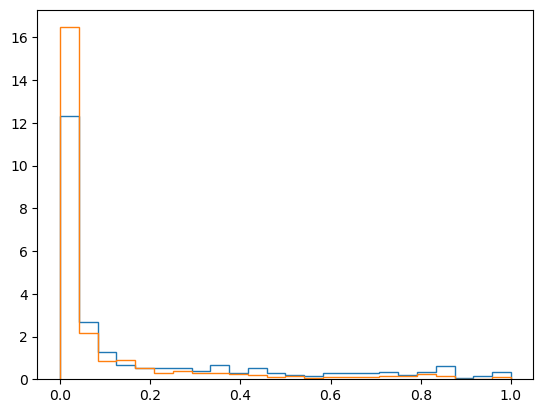

In [45]:
# Summarize across trial kinds
# pa = PAtrain
pa = PAchar
height = 25
zmax = 0.5
score_ver = "max"

# For each trial, get score
list_twind = [(0.1, 0.8)]
scores, fig, axes = Dc.scalar_score_twinds_trials(list_twind, PA=pa, tbin_dur=tbin_dur, return_fig=True, height=height, zmax=zmax,
                                                  score_ver=score_ver)

# label each trial by which shapes were drawn.
dflab = pa.Xlabels["trials"]
ax = axes.flatten()[0]
nrows = len(dflab)
mask_drawn = np.zeros(scores.shape).astype(bool)
for ind in range(len(dflab)):
    shapes_drawn = dflab.iloc[ind]["shapes_drawn"]

    # convert drawn shapes to indices
    xinds_to_mark = [Dc.MapLabelToIdx[sh] if sh in Dc.MapLabelToIdx else -1 for sh in shapes_drawn]

    # Save which ones were drawn in a mask
    mask_drawn[ind, xinds_to_mark] = True

    xinds_to_mark = [Dc.MapLabelToIdx[sh] if sh in Dc.MapLabelToIdx else -1 for sh in shapes_drawn]
    # y = nrows - ind*np.ones(len(xinds_to_mark))
    xinds_to_mark = [x+0.5 for x in xinds_to_mark]
    y = ind*np.ones(len(xinds_to_mark))+0.5
    ax.plot(xinds_to_mark, y, "xg", alpha=1)

ax = axes.flatten()[1]
ax.imshow(mask_drawn)


# Throw out decoder labels to ignore in this score (e.g,, presamp)
labels_keep = [lab for lab in Dc.MapLabelToIdx.keys() if not lab=="presamp"]
cols_keep = [Dc.MapLabelToIdx[lab] for lab in labels_keep]

scores_clean = scores[:, cols_keep, :]
mask_drawn_clean = mask_drawn[:, cols_keep, :]
print(np.mean(scores_clean[mask_drawn_clean]))
print(np.mean(scores_clean[~mask_drawn_clean]))

fig, ax = plt.subplots()

dolog = False
bins = np.linspace(0, 1, 25)
ax.hist(scores_clean[mask_drawn_clean], bins=bins, log=dolog, histtype="step", density=True);
ax.hist(scores_clean[~mask_drawn_clean], bins=bins, log=dolog, histtype="step", density=True);



In [46]:
# Convert to dataframe --> easy plotting
import pandas as pd

ntrials, ndecoderlab = scores.shape[:2]
assert len(dflab)==ntrials
res = []
for i in range(ntrials):
    for j in range(ndecoderlab):
        
        decoder_class = Dc.MultiLabelBinarizer.classes_[j]

        # What this decoder class (shape) actually drawn?
        shapes_drawn = dflab.iloc[i]["shapes_drawn"]
        shape_drawn_first = dflab.iloc[i]["seqc_0_shapesemgrp"]
        
        res.append({
            "score":scores[i, j][0],
            "decoder_class":decoder_class,
            "decoder_class_was_drawn":decoder_class in shapes_drawn,
            "decoder_class_was_first_drawn":decoder_class == shape_drawn_first,
            "row":i,
            "col":j
        })

dfscores = pd.DataFrame(res)
dfscores 

,score,decoder_class,decoder_class_was_drawn,decoder_class_was_first_drawn,row,col
0,0.829126,ARC-DD,False,False,0,0
1,0.080233,ARC-RR,True,False,0,1
2,0.140980,ARC-UU,False,False,0,2
3,0.352251,Lcentered-DL-DL,True,True,0,3
4,0.001842,Lcentered-DR-DR,False,False,0,4
...,...,...,...,...,...,...
1927,0.002576,ZZ-LL-0.0,False,False,160,7
1928,0.000477,ZZ-LL-1.0,False,False,160,8
1929,0.000893,ZZ-UU-0.0,False,False,160,9
1930,0.111140,circle-XX-XX,False,False,160,10


In [47]:
# only keep good shapes
labels_keep = [lab for lab in Dc.MapLabelToIdx.keys() if not lab=="presamp"]
dfscores = dfscores[dfscores["decoder_class"].isin(labels_keep)].reset_index(drop=True)



/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


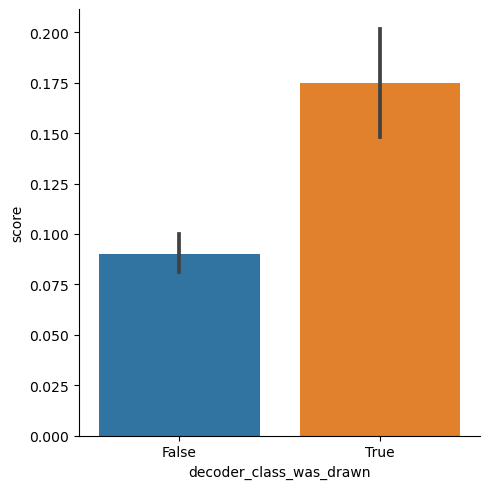

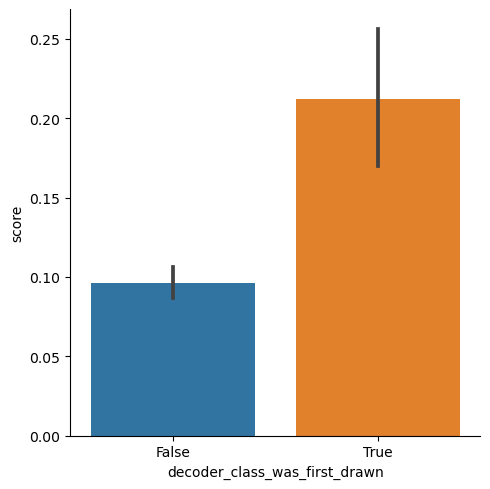

In [48]:
import seaborn as sns
# sns.catplot(data=dfscores, x="decoder_class", y="score", hue="decoder_class_was_drawn", kind="point")
sns.catplot(data=dfscores, x="decoder_class_was_drawn", y="score", kind="bar")
sns.catplot(data=dfscores, x="decoder_class_was_first_drawn", y="score", kind="bar")

/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


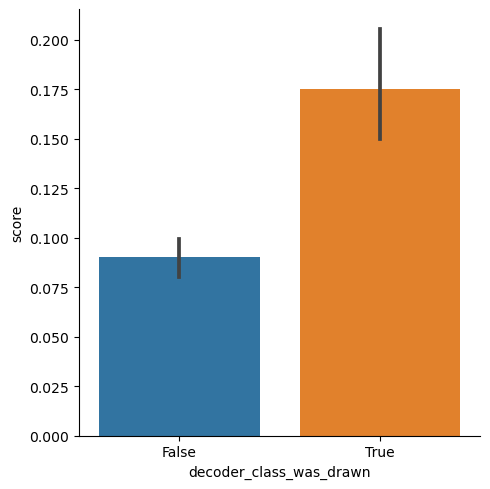

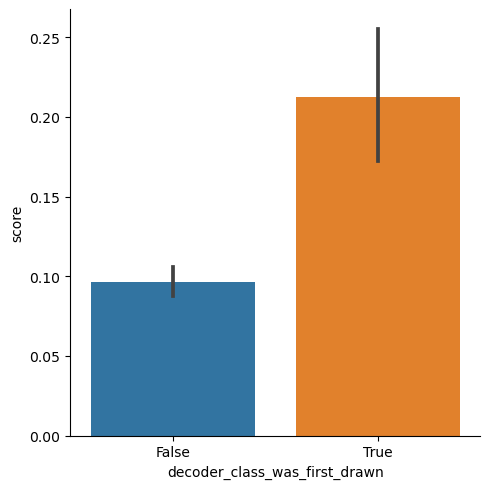

In [49]:
import seaborn as sns
# sns.catplot(data=dfscores, x="decoder_class", y="score", hue="decoder_class_was_drawn", kind="point")
sns.catplot(data=dfscores, x="decoder_class_was_drawn", y="score", kind="bar")
sns.catplot(data=dfscores, x="decoder_class_was_first_drawn", y="score", kind="bar")

/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


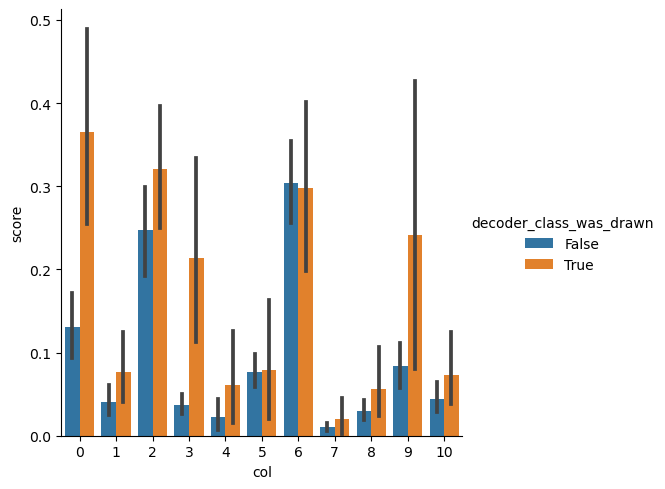

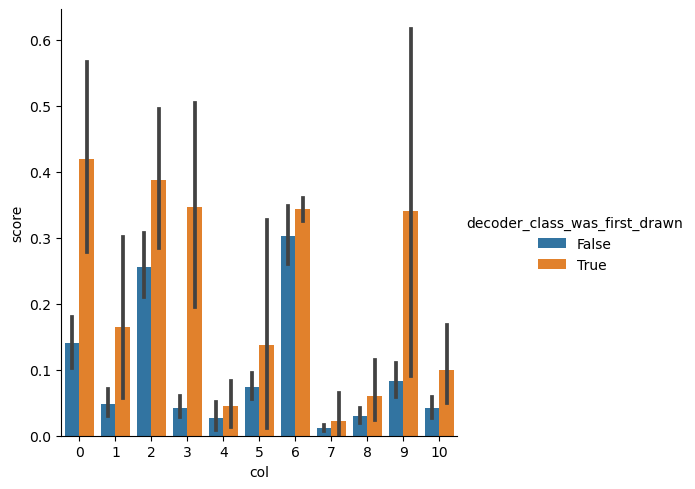

In [50]:
import seaborn as sns
# sns.catplot(data=dfscores, x="decoder_class", y="score", hue="decoder_class_was_drawn", kind="point")
sns.catplot(data=dfscores, x="col", y="score", hue="decoder_class_was_drawn", kind="bar")
sns.catplot(data=dfscores, x="col", y="score", hue="decoder_class_was_first_drawn", kind="bar")

/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


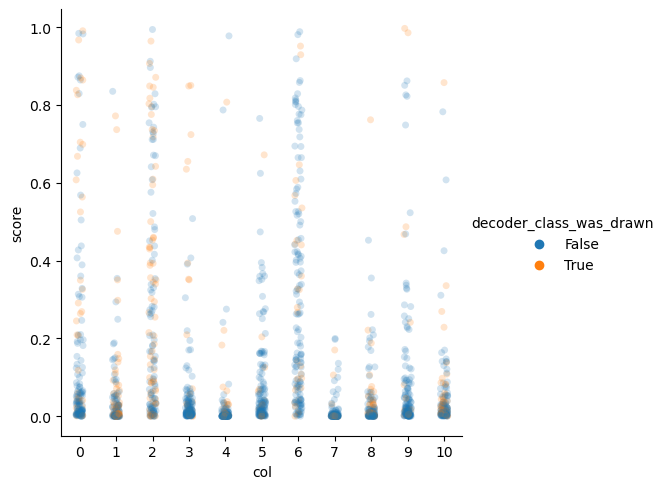

In [51]:
sns.catplot(data=dfscores, x="col", y="score", hue="decoder_class_was_drawn", alpha=0.2, jitter=True)


In [52]:
from pythonlib.tools.plottools import savefig
import os

zmax = 0.4

savedir = "/tmp/chars_same_stim_diff_beh"
os.makedirs(savedir, exist_ok=True)

### Cases where the same char is done different ways?
from pythonlib.tools.pandastools import grouping_append_and_return_inner_items_good
grpdict = grouping_append_and_return_inner_items_good(dflab, ["character"])

for grp, inds in grpdict.items():
    char = grp[0]
    if len(inds)>1:
        print(char, " -- ", len(inds))
        if len(set(dflab.iloc[inds]["shapes_drawn"].tolist()))>1:
        # if len(set(dflab.iloc[inds]["seqc_0_shapesemgrp"].tolist()))>1:
            pathis = pa.slice_by_dim_indices_wrapper("trials", inds)


            # HACKY - copying plotting code from above, to plot specific indices
            height = 5

            # For each trial, get score
            list_twind = [(0.1, 0.8)]
            scores, fig, axes = Dc.scalar_score_twinds_trials(list_twind, PA=pathis, tbin_dur=tbin_dur, return_fig=True, height=height, 
                                                              zmax=zmax,
                                                            score_ver=score_ver)

            # label each trial by which shapes were drawn.
            dflabthis = pathis.Xlabels["trials"]
            ax = axes.flatten()[0]
            nrows = len(dflabthis)
            mask_drawn = np.zeros(scores.shape).astype(bool)
            for ind in range(len(dflabthis)):

                shapes_drawn = dflabthis.iloc[ind]["shapes_drawn"]
                # shapes_drawn = [dflabthis.iloc[ind]["seqc_0_shapesemgrp"]]

                # convert drawn shapes to indices
                xinds_to_mark = [Dc.MapLabelToIdx[sh] if sh in Dc.MapLabelToIdx else -1 for sh in shapes_drawn]

                # Save which ones were drawn in a mask
                mask_drawn[ind, xinds_to_mark] = True

                xinds_to_mark = [Dc.MapLabelToIdx[sh] if sh in Dc.MapLabelToIdx else -1 for sh in shapes_drawn]
                # y = nrows - ind*np.ones(len(xinds_to_mark))
                xinds_to_mark = [x+0.5 for x in xinds_to_mark]
                y = ind*np.ones(len(xinds_to_mark))+0.5
                ax.plot(xinds_to_mark, y, "xg", alpha=1)

            ax = axes.flatten()[1]
            ax.imshow(mask_drawn)

            savefig(fig, f"{savedir}/{char}.pdf")
            
            plt.close("all")

charstrokeseq-18-11-004297  --  3
charstrokeseq-18-76-255855  --  2
charstrokeseq-19-118-192232  --  2
charstrokeseq-30-81-124921  --  2
charstrokeseq-32-10-295802  --  2
charstrokeseq-32-112-178861  --  2
charstrokeseq-32-145-863510  --  2
charstrokeseq-32-27-043721  --  2
charstrokeseq-32-34-086327  --  2
charstrokeseq-32-56-540964  --  3
charstrokeseq-33-138-693204  --  2
charstrokeseq-33-81-799839  --  2
charstrokeseq-63-14-044400  --  2
charstrokeseq-63-19-735446  --  2
charstrokeseq-63-3-637321  --  2
charstrokeseq-63-31-069778  --  2
charstrokeseq-63-34-707814  --  2
charstrokeseq-63-44-588172  --  2
charstrokeseq-63-62-819302  --  2
charstrokeseq-64-11-368572  --  2
charstrokeseq-64-2-903948  --  2
charstrokeseq-64-3-740310  --  2
charstrokeseq-64-5-010418  --  2
charstrokeseq-64-7-092239  --  2
charstrokeseq-64-9-372923  --  2
charstrokeseq-65-18-755972  --  2
charstrokeseq-65-2-190266  --  2
charstrokeseq-65-22-607764  --  2
charstrokeseq-65-31-552819  --  2
charstrokeseq-65-

# Testing the hypothesis

In [ ]:
# PRint trials with > 1 stroke
dflab = PA.Xlabels["trials"]
dflab[dflab["FEAT_num_strokes_task"]>1].index.tolist()

In [ ]:
# Plot a multi-stroke trial 
# NOTE: you can see here switching between representations of shapes

trial = 295

for i in [0,1,2,3]:
    print("stroke", i, " -- ", dflab.iloc[trial][f"seqc_{i}_shape"])

tbin_dur=0.15
tbin_slide=0.01
Dc.plot_single_trial(trial, PA=PA, tbin_dur=tbin_dur, tbin_slide=tbin_slide)


#### plot after sort labels (in progress)


In [ ]:
# NOTE: this is written for a very specific expeirmetn (Novel vs. orig prims)_.

In [ ]:
def F(x):
    if "novelprim" in x:
        return f"2{x}"
    elif "presamp" in x:
        return f"3{x}"
    else:
        return f"1{x}"


In [ ]:
labs_rows = [x[0] for x in grpdict.keys()]
labs_for_sorting = [F(x) for x in labs_rows]
inds = np.argsort(labs_for_sorting)
print(labs_for_sorting)
res_sorted = resthis[inds, :, :]
labs_rows_sorted = [labs_rows[i] for i in inds]

labs_cols = mlb.classes_
labs_for_sorting = [F(x) for x in labs_cols]
print(labs_for_sorting)
inds = np.argsort(labs_for_sorting)
res_sorted = res_sorted[:, inds, :]
labs_cols_sorted = [labs_cols[i] for i in inds]

from pythonlib.tools.snstools import heatmap_mat

ncols = 3
nrows = int(np.ceil(len(list_twind)/ncols))
fig, axes = plt.subplots(nrows, ncols, figsize=(ncols*7, nrows*5))

for ax, ind_twind in zip(axes.flatten(), range(len(list_twind))):
    if True:
        heatmap_mat(res_sorted[:, :, ind_twind], ax, False, zlims=(0, 0.3))    
        ax.set_xlabel("decoded class label")
        ax.set_ylabel("trial label")
        ax.set_title(f"twind: {list_twind[ind_twind]}")
    else:
        res_vec = np.mean(res_sorted[:, :, ind_twind], axis=0)
        xlab = [f"{i}-{x[:1]}" for i, x in enumerate(labs_cols_sorted)]
        ax.plot(xlab, res_vec, "ok")

        from pythonlib.tools.plottools import rotate_x_labels
        rotate_x_labels(ax)
        ax.set_xlabel("decoded class label")
        ax.set_ylabel("trial label")
        ax.set_title(f"twind: {list_twind[ind_twind]}")
        ax.set_ylim([0, 0.1])

        

# Older methods

### Extract single trial results

In [ ]:

# PARAMS
var_decode = "seqc_0_shape"
bregion = "PMv"
twind = (-0.4, 0.6)

In [ ]:

a = DFRES["var_decode"]==var_decode
b = DFRES["bregion"]==bregion
c = DFRES["twind"]==twind
dfthis = DFRES[a & b & c]

times = dfthis["time"]
import numpy as np
labels_predicted = np.stack(dfthis["labels_predicted"]).T # (ntrials, ntimes)
labels_test = np.stack(dfthis["labels_test"]).T
conf_scores = np.transpose(np.stack(dfthis["conf_scores"]), [1,0,2]) # (ntrials, ntimes, nclasses)

# score each time bin as correct or incorrect
labels_correct = (labels_predicted == labels_test).astype(int)


In [ ]:
# For each trial, what was its label
assert np.all(np.diff(labels_test, axis=1))==0, "otherwise cant do next step."
labels_each_trial = labels_test[:,0]
labels_orig = PA_test.Xlabels["trials"][var_decode].tolist()
assert len(labels_orig)==len(labels_each_trial)

map_labint_to_trials = {}
map_labint_to_laborig = {}
labels_unique = np.unique(labels_each_trial)
for lab in labels_unique:
    inds_this_label = np.argwhere(labels_each_trial == lab).squeeze() # the indices which ahve this label as the CORRECT
    map_labint_to_trials[lab] = inds_this_label

    # Map it back to original label
    lab_orig = PA_test.Xlabels["trials"][var_decode][inds_this_label].unique()
    assert len(lab_orig)==1
    map_labint_to_laborig[lab] = lab_orig[0]

map_trial_to_labint = {i:labint for i, labint in enumerate(labels_each_trial)}
print(map_labint_to_laborig)    
map_laborig_to_labint = {}
for labint, laborig in map_labint_to_laborig.items():
    assert laborig not in map_laborig_to_labint
    map_laborig_to_labint[laborig] = labint

import matplotlib.pyplot as plt
from pythonlib.tools.plottools import makeColors
pcols = makeColors(len(map_labint_to_laborig))
map_trial_to_seq = {}
map_trial_to_seq_ints = {}
for i, seq in enumerate(PA_test.Xlabels["trials"].loc[:, ["seqc_0_shape", "seqc_1_shape"]].values.tolist()):
    map_trial_to_seq[i] = (tuple(seq))
    map_trial_to_seq_ints[i] = [map_laborig_to_labint[s] if s in map_laborig_to_labint else s for s in seq]


In [ ]:
# Pick n random trials
import random
n=  9
trials_all = list(range(len(map_trial_to_labint)))
trials = random.sample(trials_all, n)
ncols = 3
nrows = int(np.ceil(len(trials)/ncols))
fig, axes = plt.subplots(nrows, ncols, figsize=(ncols*4, nrows*3), sharex=True, sharey=True)

for tr, ax in zip(trials, axes.flatten()):
    
    # ax = axes.flatten()[0]
    lab_pred = labels_predicted[tr,:]
    # lab_corr = labels_correct[trial,:]
    # lab_test = labels_test[trial,:]
    # ax.plot(times, lab_pred, "-ok"),
    # ax.plot(times, lab_test, "-r")
    
    # for each class, plot its time series
    for labint in map_labint_to_laborig:
        cs_this_lab = conf_scores[tr, :, labint].squeeze()
        
        ax.plot(times, cs_this_lab, label=labint, color=pcols[labint])
        # ax.plot(times[lab_pred==labint], cs_this_lab[lab_pred==labint], "-", color=pcols[labint], linewidth=4)
        ax.plot(times[lab_pred==labint], cs_this_lab[lab_pred==labint], "s", color=pcols[labint])
    
    ax.axvline(0, color="k", alpha=0.5)
    ax.set_title(f"{var_decode}={map_trial_to_labint[tr]}", color=pcols[map_trial_to_labint[tr]])
    ax.set_xlabel(f"seq: {map_trial_to_seq_ints[tr]}")
    ax.legend()
        

In [ ]:
# For each class label, collect all trials for which that is the correct label, and overlap

labels_unique = np.unique(labels_each_trial)
ncols = 3
nrows = int(np.ceil(len(labels_unique)/ncols))

fig, axes = plt.subplots(nrows, ncols, figsize=(ncols*4, nrows*4))

for lab, ax in zip(labels_unique, axes.flatten()):
    inds_this_label = np.argwhere(labels_each_trial == lab).squeeze() # the indices which ahve this label as the CORRECT 
    ax.plot(times, labels_predicted[inds_this_label, :].T, "-ok", alpha=0.05)
    ax.set_title(lab)
    
    

In [ ]:
fig, axes = plt.subplots(2,2, figsize=(10,10))

ax = axes.flatten()[0]
ax.plot(times, labels_correct.T, "xk", alpha=0.003);

In [ ]:
##### Plot the results, comparing score across methods!!
%matplotlib inline
import seaborn as sns
fig = sns.relplot(data=DFRES, x="time", y="score", hue="bregion", col="var_decode",  kind="line")


In [ ]:
##### Plot the results, comparing score across methods!!
%matplotlib inline
import seaborn as sns
fig = sns.relplot(data=DFRES, x="time", y="score", hue="bregion", col="var_decode",  kind="line")


In [ ]:
from neuralmonkey.analyses.decode_good import decodewrapouterloop_categorical_cross_time